# Subset Sum – Análise Experimental

Análise do desempenho do algoritmo Subset Sum (C vs JavaScript), focando em duas famílias de entradas:

- Variação de **maxVal** com `n = 1000` (impacto da amplitude dos valores → influência em T)
- Variação de **n** com `maxVal = 20` (impacto do tamanho do array)

Também comparamos diretamente C e JS por dataset e analisamos o complexidade teórica e prática.

---

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados fornecidos
data = [
    ["n-1000-max-100",   1000, 100,  28.335,  8.485,  2.456, 0.608, 11.54],
    ["n-1000-max-1000",  1000,1000, 271.304, 29.166, 23.285, 1.369, 11.65],
    ["n-1000-max-20",    1000,  20,   5.704,  0.535,  0.490, 0.045, 11.63],
    ["n-1000-max-50",    1000,  50,  13.882,  1.045,  1.192, 0.157, 11.64],
    ["n-1000-max-500",   1000, 500, 137.374, 10.988, 11.523, 0.760, 11.92],
    ["n-10000-max-20",  10000,  20, 582.817, 81.076, 47.660, 2.954, 12.23],
    ["n-5000-max-20",    5000,  20, 140.864,  6.716, 11.959, 0.667, 11.78]
]

columns = ["label","n","maxVal","mean_js_ms","sd_js_ms","mean_c_ms","sd_c_ms","ratio_js_c"]
df = pd.DataFrame(data, columns=columns)
df

,label,n,maxVal,mean_js_ms,sd_js_ms,mean_c_ms,sd_c_ms,ratio_js_c
0,n-1000-max-100,1000,100,28.335,8.485,2.456,0.608,11.54
1,n-1000-max-1000,1000,1000,271.304,29.166,23.285,1.369,11.65
2,n-1000-max-20,1000,20,5.704,0.535,0.490,0.045,11.63
3,n-1000-max-50,1000,50,13.882,1.045,1.192,0.157,11.64
4,n-1000-max-500,1000,500,137.374,10.988,11.523,0.760,11.92
5,n-10000-max-20,10000,20,582.817,81.076,47.660,2.954,12.23
6,n-5000-max-20,5000,20,140.864,6.716,11.959,0.667,11.78


## 1. Tempo × maxVal (n = 1000)

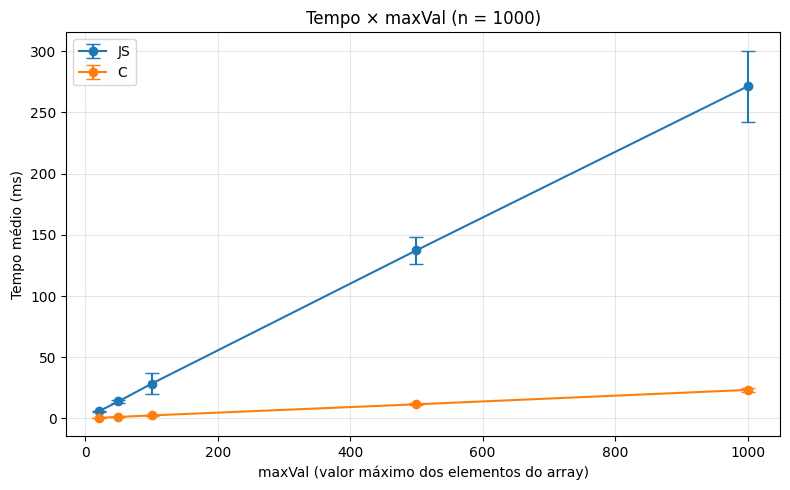

In [10]:
df_1000 = df[df["n"] == 1000].sort_values("maxVal")

plt.figure(figsize=(8,5))
plt.errorbar(df_1000.maxVal, df_1000.mean_js_ms, yerr=df_1000.sd_js_ms, fmt="o-", capsize=5, label="JS")
plt.errorbar(df_1000.maxVal, df_1000.mean_c_ms,  yerr=df_1000.sd_c_ms,  fmt="o-", capsize=5, label="C")

plt.xlabel("maxVal (valor máximo dos elementos do array)")
plt.ylabel("Tempo médio (ms)")
plt.title("Tempo × maxVal (n = 1000)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Tempo × n (maxVal = 20)

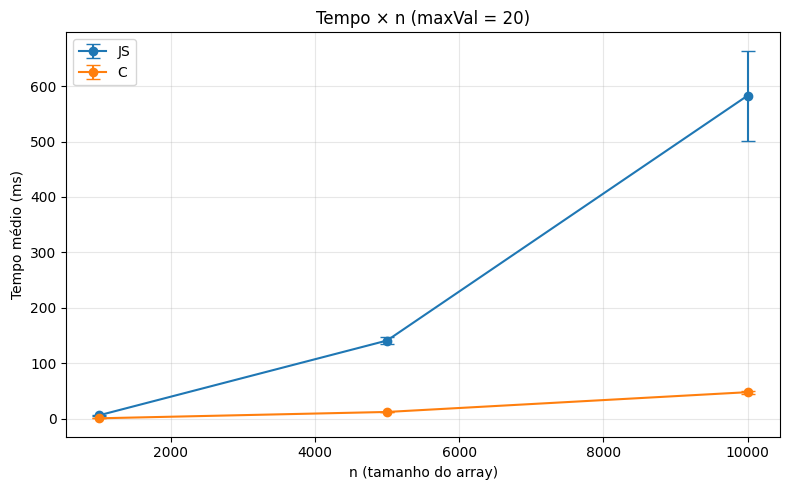

In [11]:
df_20 = df[df["maxVal"] == 20].sort_values("n")

plt.figure(figsize=(8,5))
plt.errorbar(df_20.n, df_20.mean_js_ms, yerr=df_20.sd_js_ms, fmt="o-", capsize=5, label="JS")
plt.errorbar(df_20.n, df_20.mean_c_ms,  yerr=df_20.sd_c_ms,  fmt="o-", capsize=5, label="C")

plt.xlabel("n (tamanho do array)")
plt.ylabel("Tempo médio (ms)")
plt.title("Tempo × n (maxVal = 20)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Comparação C vs JS por dataset

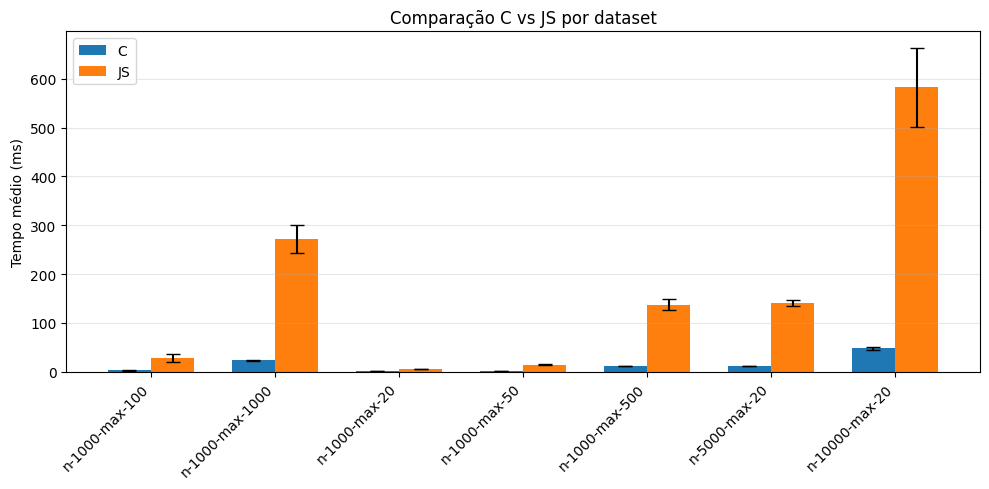

In [4]:
df_sorted = df.sort_values("n")
x = np.arange(len(df_sorted))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, df_sorted.mean_c_ms, width, yerr=df_sorted.sd_c_ms, capsize=5, label="C")
plt.bar(x + width/2, df_sorted.mean_js_ms, width, yerr=df_sorted.sd_js_ms, capsize=5, label="JS")

plt.xticks(x, df_sorted.label, rotation=45, ha="right")
plt.ylabel("Tempo médio (ms)")
plt.title("Comparação C vs JS por dataset")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Complexidade teórica VS Complexidade prática

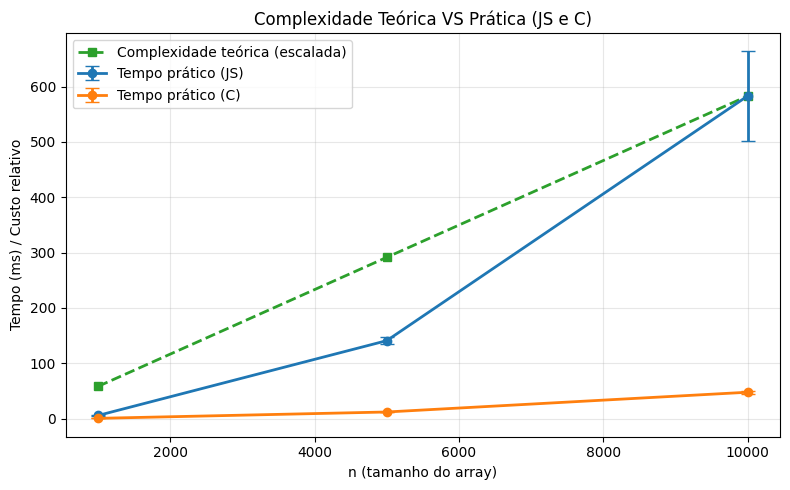

In [6]:
n_vals = np.array([1000, 5000, 10000])
maxVal_vals = np.array([20, 20, 20])

mean_js   = np.array([5.704, 140.864, 582.817])
sd_js     = np.array([0.535, 6.716, 81.076])

mean_c    = np.array([0.490, 11.959, 47.660])
sd_c      = np.array([0.045, 0.667, 2.954])

custo_teorico = n_vals * maxVal_vals

escala = mean_js.max() / custo_teorico.max()
custo_teorico_escalado = custo_teorico * escala

plt.figure(figsize=(8,5))

plt.errorbar(
    n_vals, mean_js, yerr=sd_js,
    fmt="o-", capsize=5, linewidth=2, label="Tempo prático (JS)"
)

plt.errorbar(
    n_vals, mean_c, yerr=sd_c,
    fmt="o-", capsize=5, linewidth=2, label="Tempo prático (C)"
)

plt.plot(
    n_vals, custo_teorico_escalado,
    marker="s", linestyle="--", linewidth=2,
    label="Complexidade teórica (escalada)"
)

plt.xlabel("n (tamanho do array)")
plt.ylabel("Tempo (ms) / Custo relativo")
plt.title("Complexidade Teórica VS Prática (JS e C)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
